# Solver and Analysis for Partial Differential Equation
## Autor de esta sección: Sebastián Alí Sacasa Céspedes
### Correo correspondiente: sebastian.sacasa@ucr.ac.cr

=== ESTUDIO COMPLETO DEL MODELO SSH ===

--- Estudiando régimen: Topológico (v < w) ---
  Número de bobinado: -0.999
  Fase de Berry: 3.139
  Fase de Zak: 3.139
  Fase topológica: SÍ


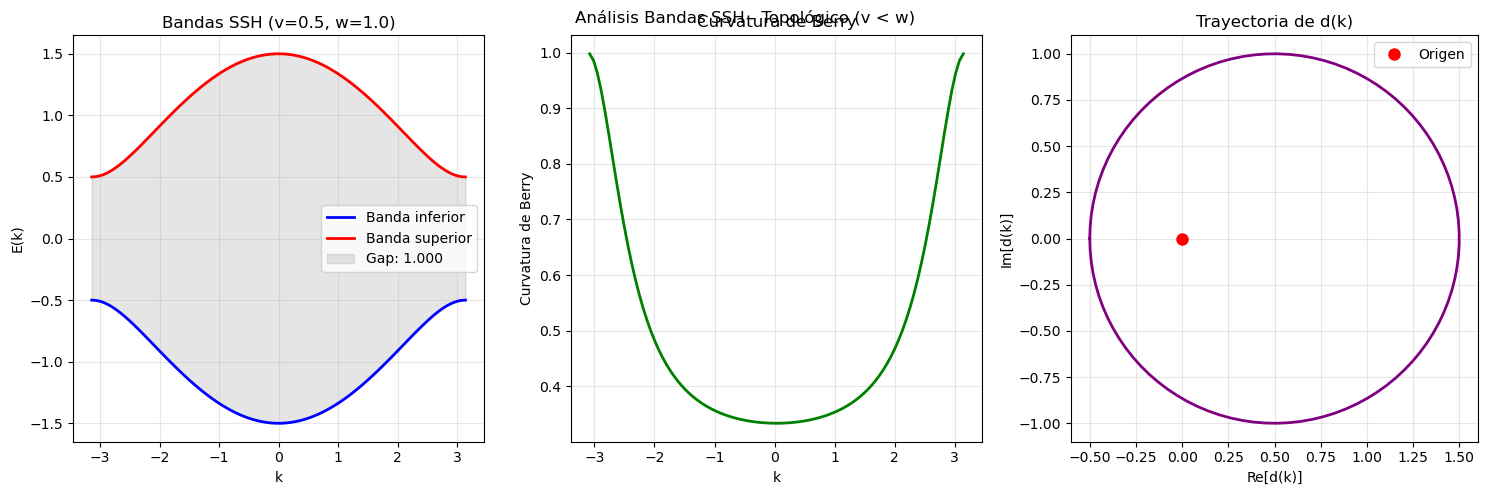

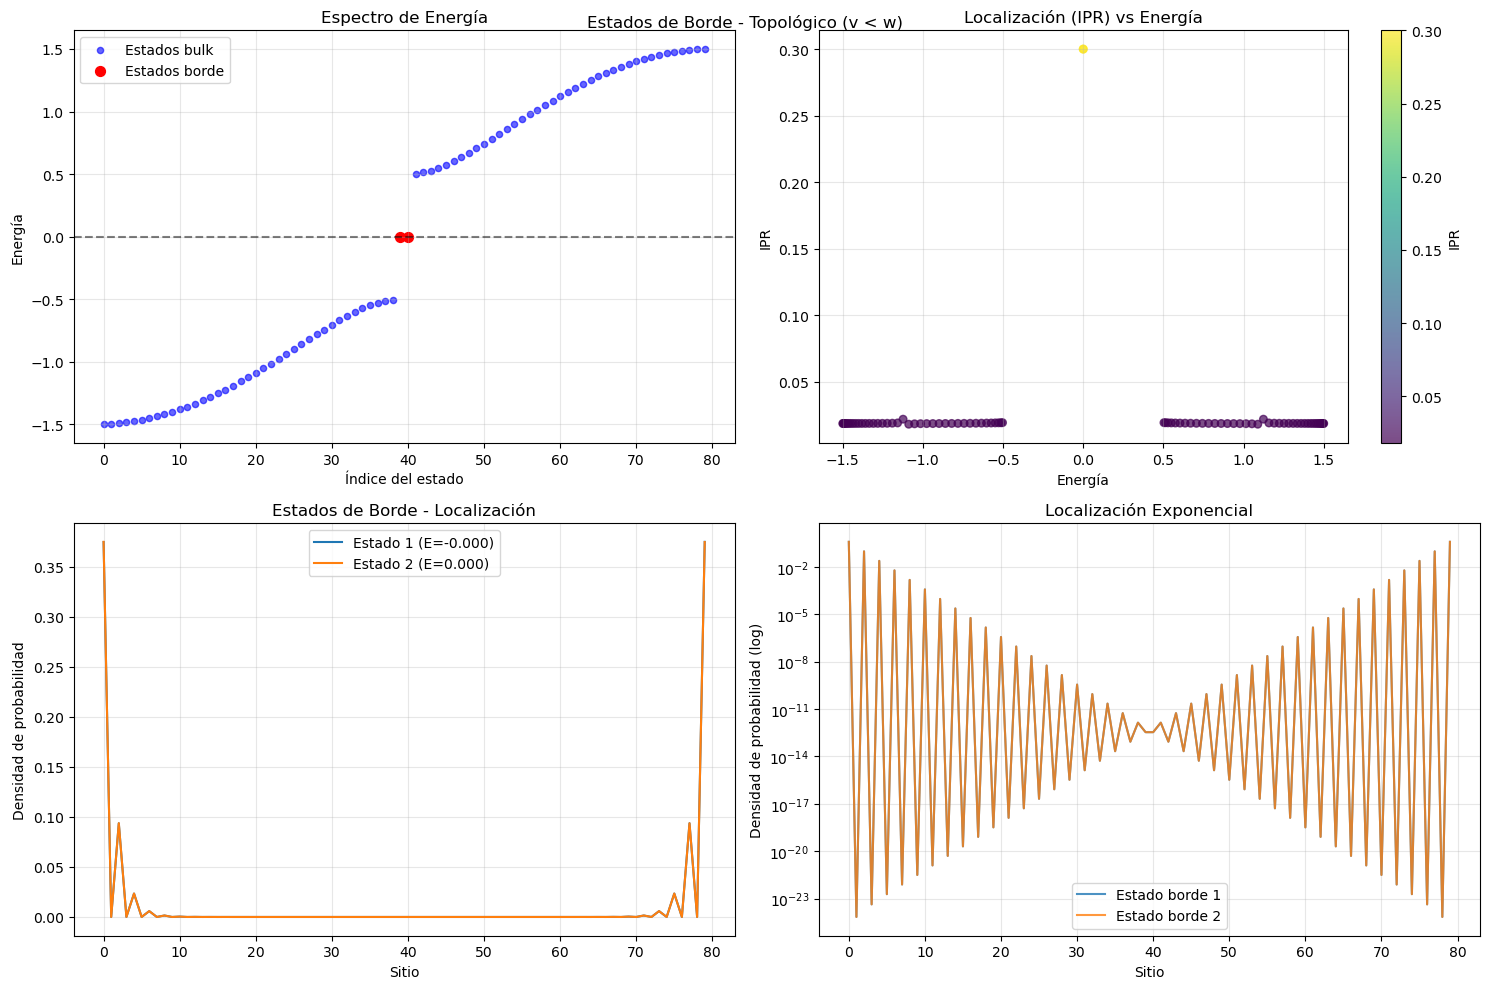


--- Estudiando régimen: Crítico (v = w) ---
  Número de bobinado: 0.000
  Fase de Berry: -0.002
  Fase de Zak: 6.282
  Fase topológica: NO


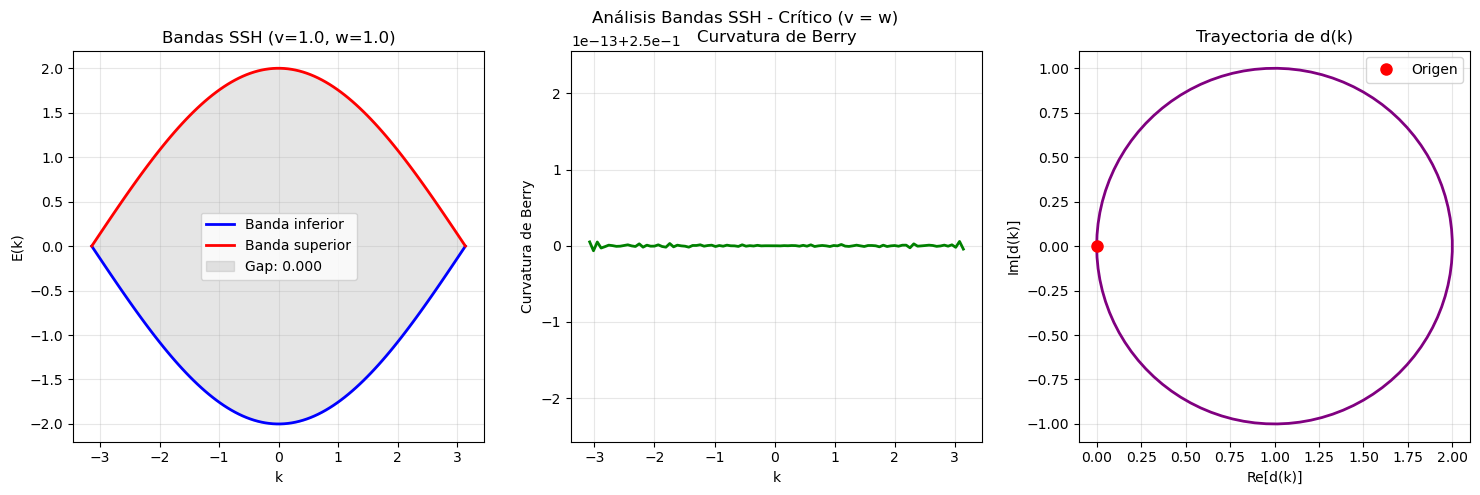

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


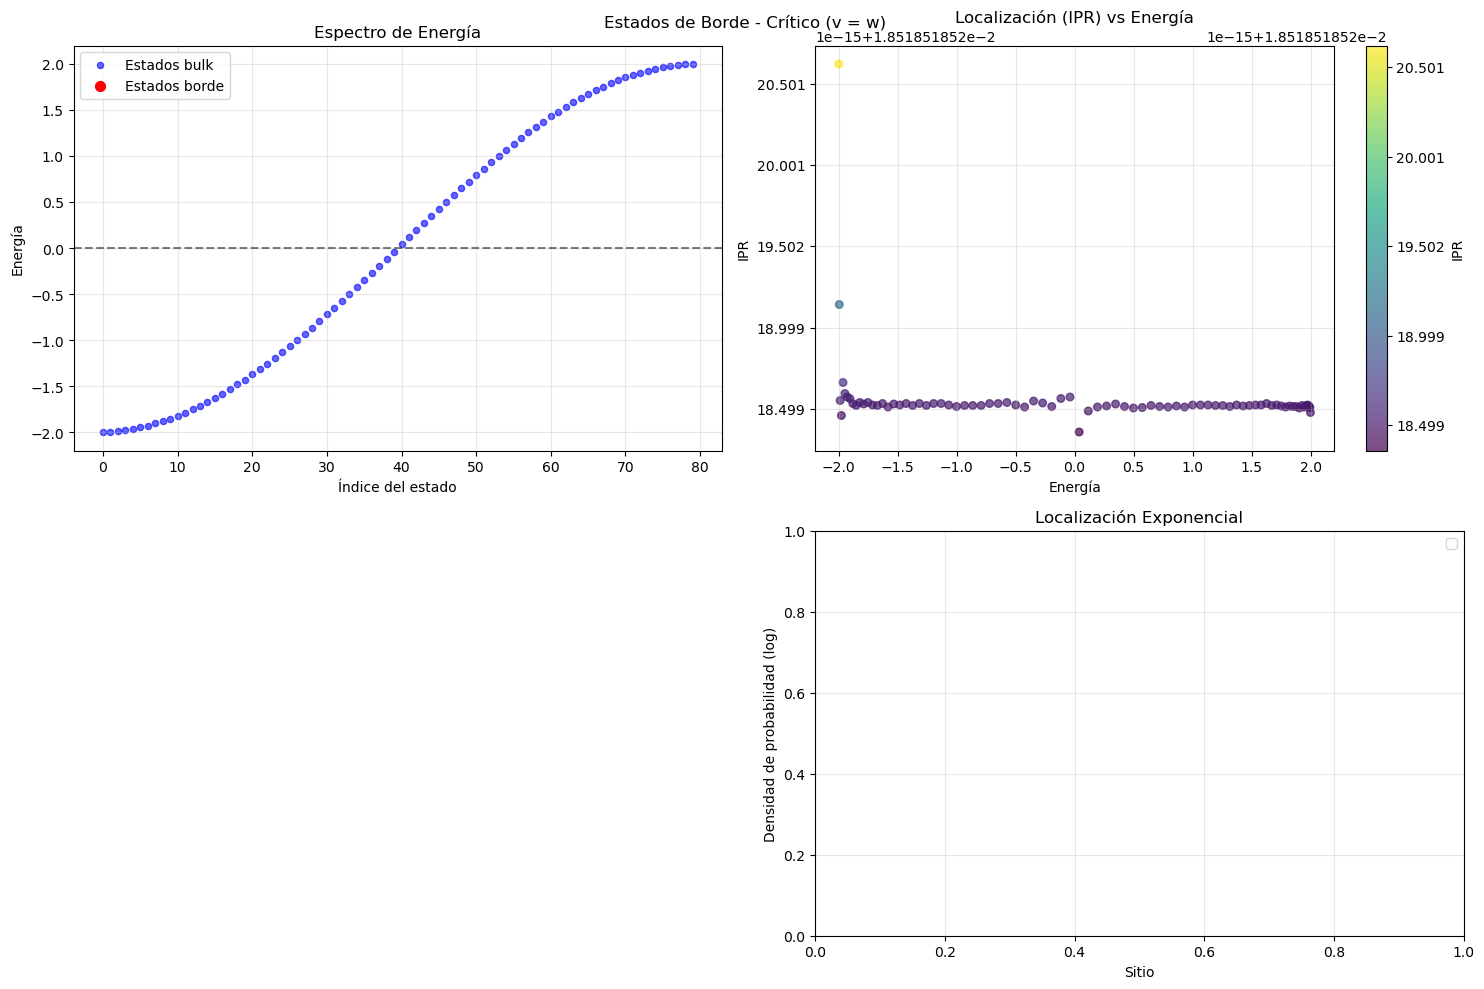


--- Estudiando régimen: Trivial (v > w) ---
  Número de bobinado: 0.000
  Fase de Berry: -0.001
  Fase de Zak: 6.282
  Fase topológica: NO


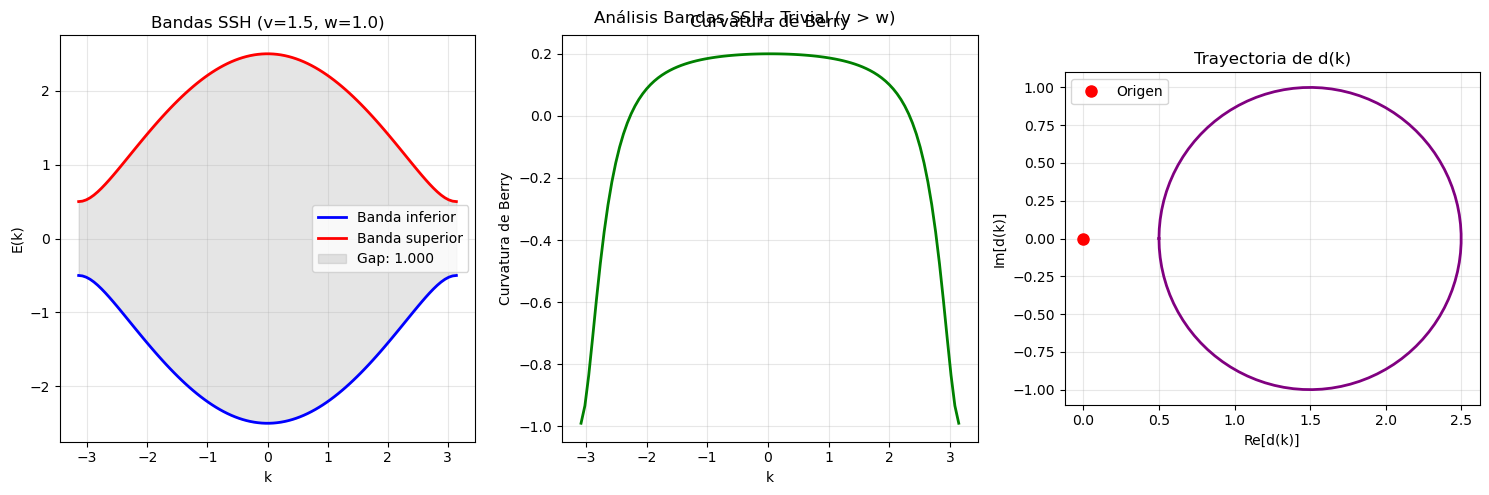

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


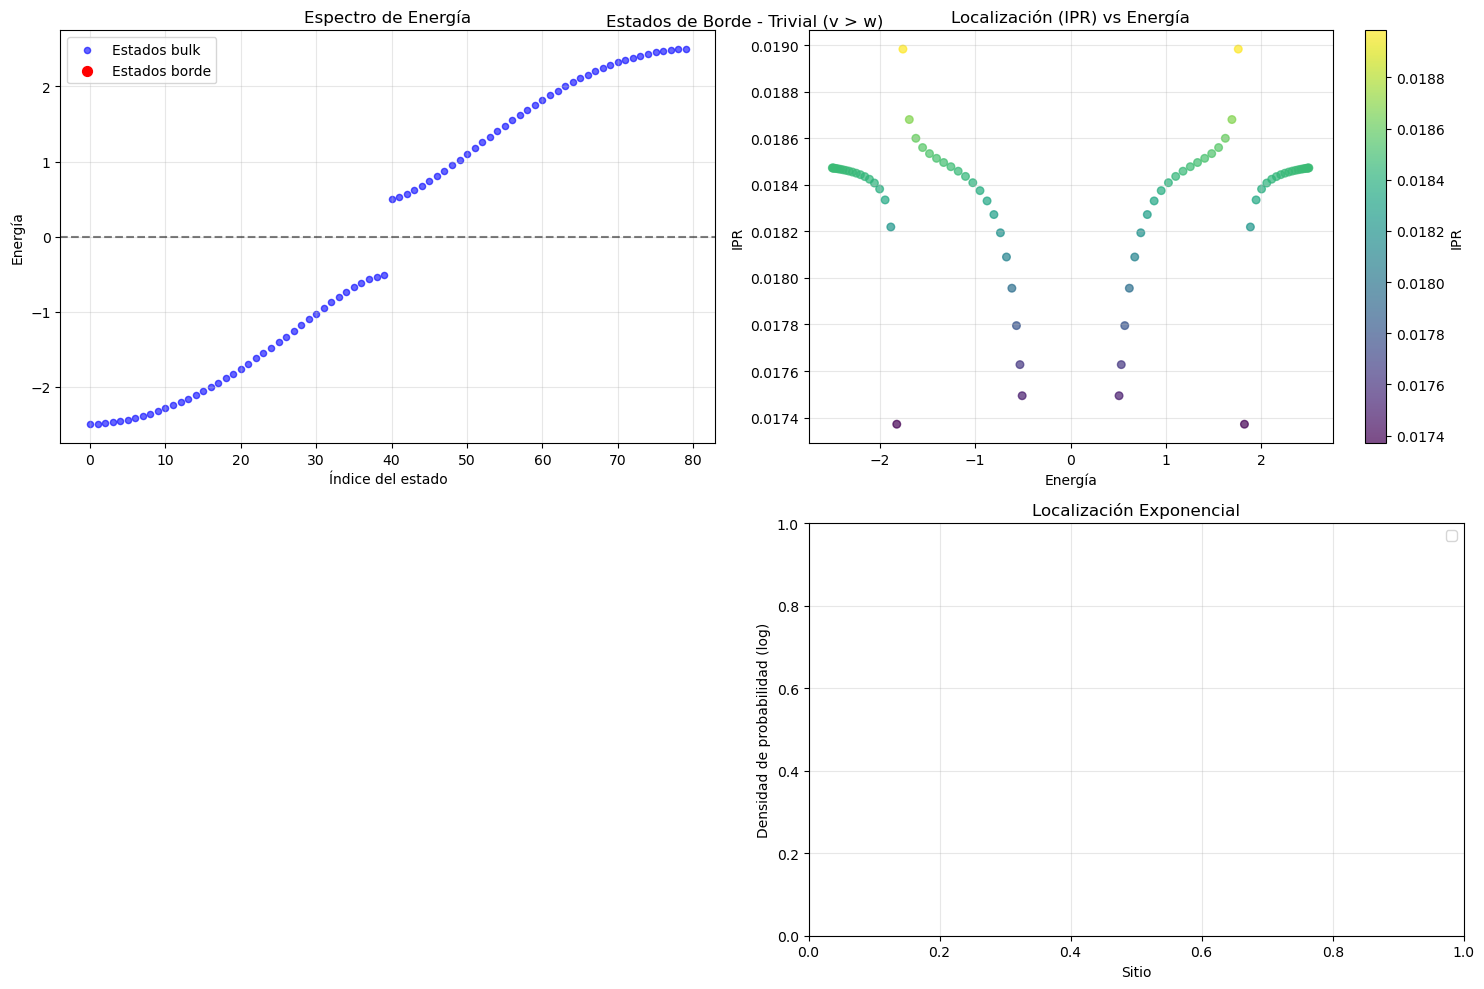


--- Generando Diagrama de Fases ---


Calculando diagrama de fases: 100%|███████████| 100/100 [00:06<00:00, 15.96it/s]


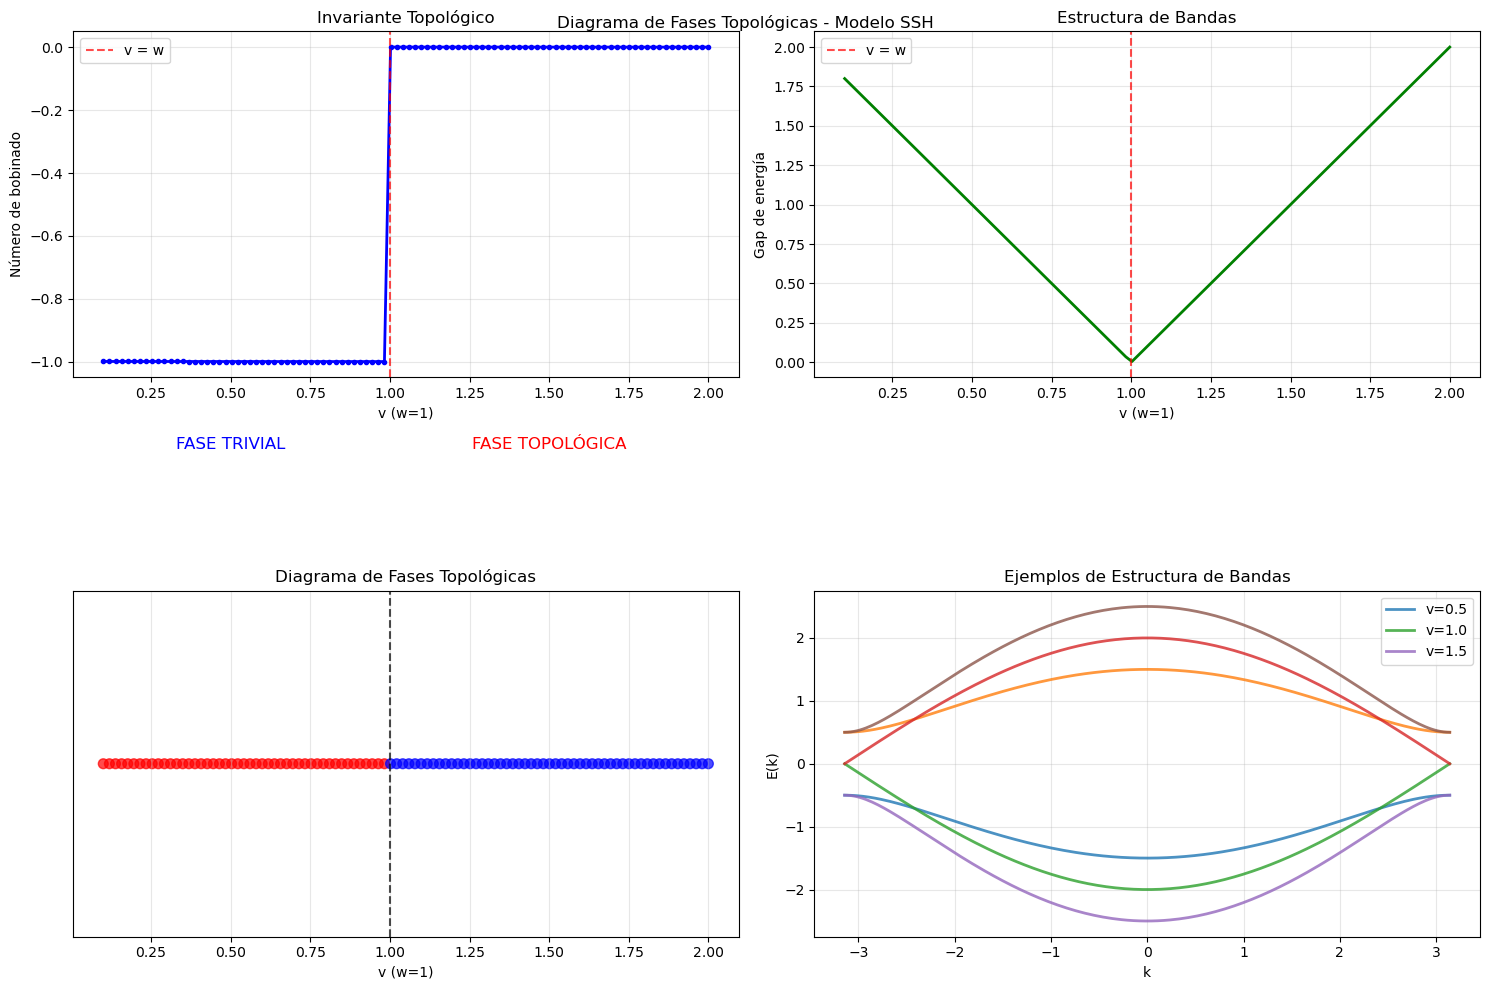


=== RESUMEN COMPARATIVO ===
Topológico (v < w):
  • Winding number: -0.999
  • Gap: 1.000
  • Estados borde: 2
  • Fase topológica: SÍ

Crítico (v = w):
  • Winding number: 0.000
  • Gap: 0.000
  • Estados borde: 0
  • Fase topológica: NO

Trivial (v > w):
  • Winding number: 0.000
  • Gap: 1.000
  • Estados borde: 0
  • Fase topológica: NO



In [14]:
"""
SSH Model Enhanced - Análisis topológico mejorado con visualizaciones avanzadas
Modelo de Su-Schrieffer-Heeger con estudio completo de transiciones de fase topológicas
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import scipy.sparse as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from matplotlib import cm
from tqdm import tqdm

class SSHModelEnhanced:
    """
    Implementación mejorada del modelo SSH con análisis topológico avanzado,
    visualizaciones profesionales y estudio de invariantes topológicos.
    """
    
    def __init__(self, N_cells=50, v=1.0, w=1.0):
        self.N_cells = N_cells
        self.v = v
        self.w = w
        self.dim = 2 * N_cells
        
    def build_finite_hamiltonian(self):
        """Hamiltoniano para cadena finita con condiciones abiertas"""
        H = sp.dok_matrix((self.dim, self.dim), dtype=complex)
        
        for i in range(self.N_cells):
            A_idx = 2 * i
            B_idx = 2 * i + 1
            
            # Enlace intra-celda (v)
            H[A_idx, B_idx] = self.v
            H[B_idx, A_idx] = self.v
            
            # Enlace inter-celda (w)
            if i < self.N_cells - 1:
                next_A_idx = 2 * (i + 1)
                H[B_idx, next_A_idx] = self.w
                H[next_A_idx, B_idx] = self.w
        
        return H.tocsr()
    
    def build_infinite_hamiltonian_k(self, k):
        """Hamiltoniano en espacio de momentos para sistema infinito"""
        H_k = np.zeros((2, 2), dtype=complex)
        H_k[0, 1] = self.v + self.w * np.exp(-1j * k)
        H_k[1, 0] = np.conj(H_k[0, 1])
        return H_k
    
    def calculate_band_structure(self, k_points=200):
        """Estructura de bandas con cálculo de curvatura de Berry"""
        k_values = np.linspace(-np.pi, np.pi, k_points)
        energies = np.zeros((len(k_values), 2))
        berry_curvature = np.zeros(len(k_values))
        
        for i, k in enumerate(k_values):
            H_k = self.build_infinite_hamiltonian_k(k)
            eigvals, eigvecs = eigh(H_k)
            energies[i] = eigvals
            
            # Calcular conexión de Berry
            if i > 0:
                # Producto interno entre estados vecinos
                overlap = np.vdot(eigvecs[:, 0], prev_eigvecs[:, 0])
                berry_curvature[i] = -np.angle(overlap) / (k_values[i] - k_values[i-1])
            
            prev_eigvecs = eigvecs
        
        return k_values, energies, berry_curvature
    
    def calculate_topological_invariants(self, k_points=1000):
        """Calcula múltiples invariantes topológicos"""
        k_values = np.linspace(0, 2*np.pi, k_points, endpoint=False)
        
        # Número de bobinado tradicional
        winding = self._calculate_winding_number(k_values)
        
        # Fase de Berry
        berry_phase = self._calculate_berry_phase(k_values)
        
        # Polarización de Zak
        zak_phase = self._calculate_zak_phase(k_values)
        
        return {
            'winding_number': winding,
            'berry_phase': berry_phase,
            'zak_phase': zak_phase,
            'topological_phase': abs(winding) > 0.5
        }
    
    def _calculate_winding_number(self, k_values):
        """Calcula número de bobinado mejorado"""
        dk = k_values[1] - k_values[0]
        total_phase = 0
        prev_phase = np.angle(self.v + self.w * np.exp(-1j * k_values[0]))
        
        for k in k_values[1:]:
            h_k = self.v + self.w * np.exp(-1j * k)
            current_phase = np.angle(h_k)
            
            phase_diff = current_phase - prev_phase
            if phase_diff > np.pi:
                phase_diff -= 2 * np.pi
            elif phase_diff < -np.pi:
                phase_diff += 2 * np.pi
                
            total_phase += phase_diff
            prev_phase = current_phase
        
        return total_phase / (2 * np.pi)
    
    def _calculate_berry_phase(self, k_values):
        """Calcula fase de Berry para la banda inferior"""
        berry_phase = 0
        prev_eigvec = None
        
        for k in k_values:
            H_k = self.build_infinite_hamiltonian_k(k)
            eigvals, eigvecs = eigh(H_k)
            
            if prev_eigvec is not None:
                overlap = np.vdot(eigvecs[:, 0], prev_eigvec)
                berry_phase += -np.imag(np.log(overlap))
            
            prev_eigvec = eigvecs[:, 0]
        
        return berry_phase
    
    def _calculate_zak_phase(self, k_values):
        """Calcula fase de Zak (polarización eléctrica)"""
        zak_phase = 0
        u_prev = None
        
        for k in k_values:
            H_k = self.build_infinite_hamiltonian_k(k)
            eigvals, eigvecs = eigh(H_k)
            u_k = eigvecs[:, 0]  # Estado de Bloch
            
            if u_prev is not None:
                overlap = np.vdot(u_k, u_prev)
                zak_phase += -np.imag(np.log(overlap))
            
            u_prev = u_k
        
        return zak_phase % (2 * np.pi)
    
    def diagonalize_finite_chain(self):
        """Diagonalización con análisis de localización"""
        H_finite = self.build_finite_hamiltonian()
        eigenvalues, eigenvectors = eigh(H_finite.todense())
        
        # Calcular IPR (Inverse Participation Ratio) para medir localización
        ipr_values = np.zeros(self.dim)
        for i in range(self.dim):
            psi = eigenvectors[:, i]
            ipr_values[i] = np.sum(np.abs(psi)**4) / (np.sum(np.abs(psi)**2))**2
        
        return eigenvalues, eigenvectors, ipr_values
    
    def find_edge_states(self, eigenvectors, eigenvalues, energy_tol=1e-3):
        """Identifica estados de borde con análisis de localización"""
        zero_energy_indices = np.where(np.abs(eigenvalues) < energy_tol)[0]
        edge_states = []
        
        for idx in zero_energy_indices:
            state = eigenvectors[:, idx]
            # Verificar si está localizado en los bordes
            edge_weight = (np.sum(np.abs(state[:5])**2) + 
                         np.sum(np.abs(state[-5:])**2)) / np.sum(np.abs(state)**2)
            
            if edge_weight > 0.3:  # Umbral de localización en bordes
                edge_states.append({
                    'state': state,
                    'energy': eigenvalues[idx],
                    'localization': edge_weight,
                    'index': idx
                })
        
        return edge_states

class SSHVisualizer:
    """Visualizador avanzado para el modelo SSH"""
    
    @staticmethod
    def plot_band_structure_3d(ssh_model, k_points=100):
        """Estructura de bandas 3D con información topológica"""
        k_values, energies, berry_curvature = ssh_model.calculate_band_structure(k_points)
        
        fig = plt.figure(figsize=(15, 5))
        
        # Subplot 1: Estructura de bandas tradicional
        ax1 = fig.add_subplot(131)
        ax1.plot(k_values, energies[:, 0], 'b-', linewidth=2, label='Banda inferior')
        ax1.plot(k_values, energies[:, 1], 'r-', linewidth=2, label='Banda superior')
        gap = np.min(energies[:, 1]) - np.max(energies[:, 0])
        ax1.fill_between(k_values, energies[:, 0], energies[:, 1], 
                        alpha=0.2, color='gray', label=f'Gap: {gap:.3f}')
        ax1.set_xlabel('k')
        ax1.set_ylabel('E(k)')
        ax1.set_title(f'Bandas SSH (v={ssh_model.v}, w={ssh_model.w})')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Subplot 2: Curvatura de Berry
        ax2 = fig.add_subplot(132)
        ax2.plot(k_values[1:], berry_curvature[1:], 'g-', linewidth=2)
        ax2.set_xlabel('k')
        ax2.set_ylabel('Curvatura de Berry')
        ax2.set_title('Curvatura de Berry')
        ax2.grid(True, alpha=0.3)
        
        # Subplot 3: Vector d(k) en el plano complejo
        ax3 = fig.add_subplot(133)
        d_vector = ssh_model.v + ssh_model.w * np.exp(-1j * k_values)
        ax3.plot(d_vector.real, d_vector.imag, 'purple', linewidth=2)
        ax3.plot(0, 0, 'ro', markersize=8, label='Origen')
        ax3.set_xlabel('Re[d(k)]')
        ax3.set_ylabel('Im[d(k)]')
        ax3.set_title('Trayectoria de d(k)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_aspect('equal')
        
        plt.tight_layout()
        return fig, gap
    
    @staticmethod
    def plot_edge_states_analysis(ssh_model, energy_tol=1e-3):
        """Análisis completo de estados de borde"""
        eigenvalues, eigenvectors, ipr_values = ssh_model.diagonalize_finite_chain()
        edge_states = ssh_model.find_edge_states(eigenvectors, eigenvalues, energy_tol)
        
        fig = plt.figure(figsize=(15, 10))
        
        # Subplot 1: Espectro de energía con estados de borde resaltados
        ax1 = fig.add_subplot(221)
        all_indices = range(len(eigenvalues))
        edge_indices = [state['index'] for state in edge_states]
        bulk_indices = [i for i in all_indices if i not in edge_indices]
        
        ax1.scatter(bulk_indices, eigenvalues[bulk_indices], 
                   c='blue', alpha=0.6, label='Estados bulk', s=20)
        ax1.scatter(edge_indices, eigenvalues[edge_indices], 
                   c='red', alpha=1.0, label='Estados borde', s=50)
        ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax1.set_xlabel('Índice del estado')
        ax1.set_ylabel('Energía')
        ax1.set_title('Espectro de Energía')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Subplot 2: IPR vs Energía
        ax2 = fig.add_subplot(222)
        scatter = ax2.scatter(eigenvalues, ipr_values, c=ipr_values, 
                             cmap='viridis', alpha=0.7, s=30)
        ax2.set_xlabel('Energía')
        ax2.set_ylabel('IPR')
        ax2.set_title('Localización (IPR) vs Energía')
        plt.colorbar(scatter, ax=ax2, label='IPR')
        ax2.grid(True, alpha=0.3)
        
        # Subplot 3: Densidad de probabilidad de estados de borde
        if edge_states:
            ax3 = fig.add_subplot(223)
            for i, state_info in enumerate(edge_states):
                state = state_info['state']
                prob_density = np.abs(state)**2
                ax3.plot(range(ssh_model.dim), prob_density, 
                        label=f'Estado {i+1} (E={state_info["energy"]:.3f})')
            ax3.set_xlabel('Sitio')
            ax3.set_ylabel('Densidad de probabilidad')
            ax3.set_title('Estados de Borde - Localización')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
        
        # Subplot 4: Análisis de localización
        ax4 = fig.add_subplot(224)
        site_positions = np.arange(ssh_model.dim)
        if edge_states:
            for i, state_info in enumerate(edge_states):
                state = state_info['state']
                prob_density = np.abs(state)**2
                ax4.semilogy(site_positions, prob_density, 
                           label=f'Estado borde {i+1}', alpha=0.8)
        ax4.set_xlabel('Sitio')
        ax4.set_ylabel('Densidad de probabilidad (log)')
        ax4.set_title('Localización Exponencial')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig, edge_states
    
    @staticmethod
    def plot_phase_diagram(v_range=(0.1, 2.0), w=1.0, n_points=50, N_cells=30):
        """Diagrama de fases completo del modelo SSH"""
        v_values = np.linspace(v_range[0], v_range[1], n_points)
        winding_numbers = []
        gaps = []
        topological_phases = []
        
        for v in tqdm(v_values, desc="Calculando diagrama de fases"):
            ssh = SSHModelEnhanced(N_cells=N_cells, v=v, w=w)
            
            # Calcular invariantes topológicos
            invariants = ssh.calculate_topological_invariants()
            winding_numbers.append(invariants['winding_number'])
            topological_phases.append(invariants['topological_phase'])
            
            # Calcular gap
            k_vals, energies, _ = ssh.calculate_band_structure()
            gap = np.min(energies[:, 1]) - np.max(energies[:, 0])
            gaps.append(gap)
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Subplot 1: Número de bobinado
        axes[0, 0].plot(v_values, winding_numbers, 'b-', linewidth=2, marker='o', markersize=3)
        axes[0, 0].axvline(x=w, color='red', linestyle='--', alpha=0.7, label='v = w')
        axes[0, 0].set_xlabel('v (w=1)')
        axes[0, 0].set_ylabel('Número de bobinado')
        axes[0, 0].set_title('Invariante Topológico')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].legend()
        
        # Subplot 2: Gap de energía
        axes[0, 1].plot(v_values, gaps, 'g-', linewidth=2)
        axes[0, 1].axvline(x=w, color='red', linestyle='--', alpha=0.7, label='v = w')
        axes[0, 1].set_xlabel('v (w=1)')
        axes[0, 1].set_ylabel('Gap de energía')
        axes[0, 1].set_title('Estructura de Bandas')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].legend()
        
        # Subplot 3: Diagrama de fases
        phase_colors = ['red' if phase else 'blue' for phase in topological_phases]
        axes[1, 0].scatter(v_values, [1]*len(v_values), c=phase_colors, s=50, alpha=0.7)
        axes[1, 0].axvline(x=w, color='black', linestyle='--', alpha=0.7)
        axes[1, 0].set_xlabel('v (w=1)')
        axes[1, 0].set_yticks([])
        axes[1, 0].set_title('Diagrama de Fases Topológicas')
        axes[1, 0].text(0.5, 1.1, 'FASE TRIVIAL', ha='center', color='blue', fontsize=12)
        axes[1, 0].text(1.5, 1.1, 'FASE TOPOLÓGICA', ha='center', color='red', fontsize=12)
        axes[1, 0].grid(True, alpha=0.3)
        
        # Subplot 4: Ejemplos de bandas para diferentes fases
        example_v = [0.5, 1.0, 1.5]
        for i, v in enumerate(example_v):
            ssh = SSHModelEnhanced(N_cells=N_cells, v=v, w=w)
            k_vals, energies, _ = ssh.calculate_band_structure()
            
            axes[1, 1].plot(k_vals, energies[:, 0], 
                           label=f'v={v}', linewidth=2, alpha=0.8)
            axes[1, 1].plot(k_vals, energies[:, 1], 
                           linewidth=2, alpha=0.8)
        
        axes[1, 1].set_xlabel('k')
        axes[1, 1].set_ylabel('E(k)')
        axes[1, 1].set_title('Ejemplos de Estructura de Bandas')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig

def comprehensive_ssh_study():
    """
    Estudio completo y profesional del modelo SSH
    """
    print("=== ESTUDIO COMPLETO DEL MODELO SSH ===")
    
    # Configuración de parámetros
    regimes = [
        {'v': 0.5, 'w': 1.0, 'label': 'Topológico (v < w)'},
        {'v': 1.0, 'w': 1.0, 'label': 'Crítico (v = w)'},
        {'v': 1.5, 'w': 1.0, 'label': 'Trivial (v > w)'}
    ]
    
    results = {}
    visualizer = SSHVisualizer()
    
    for regime in regimes:
        print(f"\n--- Estudiando régimen: {regime['label']} ---")
        
        # Crear modelo
        ssh = SSHModelEnhanced(N_cells=40, v=regime['v'], w=regime['w'])
        
        # Calcular invariantes topológicos
        invariants = ssh.calculate_topological_invariants()
        print(f"  Número de bobinado: {invariants['winding_number']:.3f}")
        print(f"  Fase de Berry: {invariants['berry_phase']:.3f}")
        print(f"  Fase de Zak: {invariants['zak_phase']:.3f}")
        print(f"  Fase topológica: {'SÍ' if invariants['topological_phase'] else 'NO'}")
        
        # Visualizaciones
        fig_bands, gap = visualizer.plot_band_structure_3d(ssh)
        plt.suptitle(f"Análisis Bandas SSH - {regime['label']}")
        plt.show()
        
        fig_edges, edge_states = visualizer.plot_edge_states_analysis(ssh)
        plt.suptitle(f"Estados de Borde - {regime['label']}")
        plt.show()
        
        results[regime['label']] = {
            'invariants': invariants,
            'gap': gap,
            'edge_states_count': len(edge_states)
        }
    
    # Diagrama de fases completo
    print("\n--- Generando Diagrama de Fases ---")
    fig_phase = visualizer.plot_phase_diagram(v_range=(0.1, 2.0), n_points=100)
    plt.suptitle("Diagrama de Fases Topológicas - Modelo SSH")
    plt.show()
    
    # Resumen final
    print("\n=== RESUMEN COMPARATIVO ===")
    for regime_name, result in results.items():
        print(f"{regime_name}:")
        print(f"  • Winding number: {result['invariants']['winding_number']:.3f}")
        print(f"  • Gap: {result['gap']:.3f}")
        print(f"  • Estados borde: {result['edge_states_count']}")
        print(f"  • Fase topológica: {'SÍ' if result['invariants']['topological_phase'] else 'NO'}")
        print()

if __name__ == "__main__":
    comprehensive_ssh_study()

In [15]:
import numpy as np
from scipy.special import erfc

class PeriodicCoulomb:
    """
    Implementación de correcciones periódicas al potencial de Coulomb
    """
    
    def __init__(self, box_size, alpha=5.0):
        self.box_size = box_size
        self.alpha = alpha  # Parámetro de splitting
        self.volume = box_size**3
        
    def ewald_real_space(self, r, charges, positions):
        """
        Contribución del espacio real
        """
        phi_real = 0.0
        for i, (q_i, pos_i) in enumerate(zip(charges, positions)):
            # Mínima imagen
            dr = r - pos_i
            dr -= np.round(dr / self.box_size) * self.box_size
            r_ij = np.linalg.norm(dr)
            
            if r_ij > 1e-10:
                phi_real += q_i * erfc(self.alpha * r_ij) / r_ij
                
        return phi_real
    
    def ewald_reciprocal_space(self, r, charges, positions, kmax=10):
        """
        Contribución del espacio recíproco
        """
        phi_rec = 0.0
        k_vectors = self._generate_k_vectors(kmax)
        
        for k in k_vectors:
            k_norm = np.linalg.norm(k)
            if k_norm == 0:
                continue
                
            structure_factor = 0.0
            for q_j, pos_j in zip(charges, positions):
                structure_factor += q_j * np.exp(1j * np.dot(k, pos_j))
                
            phi_rec += (4 * np.pi / self.volume) * (np.exp(-k_norm**2 / (4 * self.alpha**2)) / k_norm**2) * \
                      np.real(structure_factor * np.exp(-1j * np.dot(k, r)))
                      
        return phi_rec
    
    def self_energy_correction(self, charges):
        """
        Corrección de auto-energía
        """
        return - (self.alpha / np.sqrt(np.pi)) * np.sum(charges**2)
    
    def total_periodic_potential(self, r, charges, positions):
        """
        Potencial periódico total
        """
        phi_real = self.ewald_real_space(r, charges, positions)
        phi_rec = self.ewald_reciprocal_space(r, charges, positions)
        phi_self = self.self_energy_correction(charges)
        
        return phi_real + phi_rec + phi_self
    
    def _generate_k_vectors(self, kmax):
        """Genera vectores k para suma recíproca"""
        k_vectors = []
        for i in range(-kmax, kmax + 1):
            for j in range(-kmax, kmax + 1):
                for k in range(-kmax, kmax + 1):
                    if i == 0 and j == 0 and k == 0:
                        continue
                    k_vec = 2 * np.pi * np.array([i, j, k]) / self.box_size
                    k_vectors.append(k_vec)
        return k_vectors

# Ejemplo de uso
def ejemplo_correccion_periodica():
    """Demostración de la corrección periódica"""
    # Sistema periódico cúbico
    box_size = 10.0
    pc = PeriodicCoulomb(box_size)
    
    # Cargas y posiciones
    charges = np.array([1.0, -1.0])  # e.g., NaCl
    positions = np.array([[0.0, 0.0, 0.0], 
                         [0.5, 0.5, 0.5]]) * box_size
    
    # Calcular potencial en un punto
    r_test = np.array([1.0, 1.0, 1.0])
    phi_total = pc.total_periodic_potential(r_test, charges, positions)
    
    print(f"Potencial periódico en r={r_test}: {phi_total:.6f}")
    
    # Comparar con Coulomb simple
    phi_simple = 0.0
    for q, pos in zip(charges, positions):
        dr = r_test - pos
        r_norm = np.linalg.norm(dr)
        phi_simple += q / r_norm if r_norm > 1e-10 else 0
    
    print(f"Potencial Coulomb simple: {phi_simple:.6f}")
    print(f"Diferencia: {abs(phi_total - phi_simple):.6f}")

if __name__ == "__main__":
    ejemplo_correccion_periodica()

Potencial periódico en r=[1. 1. 1.]: -5.268706
Potencial Coulomb simple: 0.433013
Diferencia: 5.701719


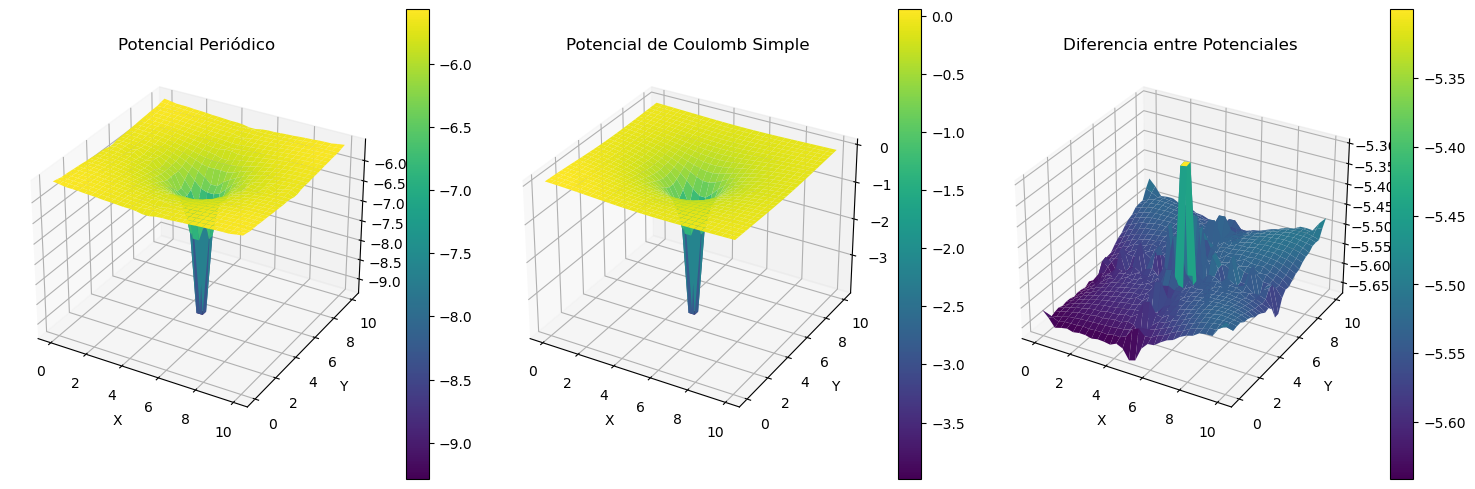

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualizar_potencial_periodico():
    # Parámetros del sistema
    box_size = 10.0
    pc = PeriodicCoulomb(box_size)
    
    # Cargas y posiciones
    charges = np.array([1.0, -1.0])
    positions = np.array([[0.0, 0.0, 0.0], 
                         [0.5, 0.5, 0.5]]) * box_size
    
    # Crear grid para visualización
    x = np.linspace(0, box_size, 30)
    y = np.linspace(0, box_size, 30)
    X, Y = np.meshgrid(x, y)
    
    # Calcular potencial en el plano z=box_size/2
    Z_periodic = np.zeros_like(X)
    Z_simple = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            r = np.array([X[i,j], Y[i,j], box_size/2])
            Z_periodic[i,j] = pc.total_periodic_potential(r, charges, positions)
            
            # Calcular potencial de Coulomb simple para comparación
            phi_simple = 0.0
            for q, pos in zip(charges, positions):
                dr = r - pos
                r_norm = np.linalg.norm(dr)
                phi_simple += q / r_norm if r_norm > 1e-10 else 0
            Z_simple[i,j] = phi_simple
    
    # Crear subplots para comparación
    fig = plt.figure(figsize=(15, 5))
    
    # Potencial periódico
    ax1 = fig.add_subplot(131, projection='3d')
    surf1 = ax1.plot_surface(X, Y, Z_periodic, cmap='viridis')
    ax1.set_title('Potencial Periódico')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Potencial')
    plt.colorbar(surf1, ax=ax1)
    
    # Potencial de Coulomb simple
    ax2 = fig.add_subplot(132, projection='3d')
    surf2 = ax2.plot_surface(X, Y, Z_simple, cmap='viridis')
    ax2.set_title('Potencial de Coulomb Simple')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Potencial')
    plt.colorbar(surf2, ax=ax2)
    
    # Diferencia entre potenciales
    ax3 = fig.add_subplot(133, projection='3d')
    diff = Z_periodic - Z_simple
    surf3 = ax3.plot_surface(X, Y, diff, cmap='viridis')
    ax3.set_title('Diferencia entre Potenciales')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Diferencia')
    plt.colorbar(surf3, ax=ax3)
    
    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
visualizar_potencial_periodico()

In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.linalg import eigh

class SSHModelExact:
    """
    Implementación EXACTA con tu potencial: V(r) = -e²/4πr + e²exp(-μr)/4πr
    donde μ = √(60π²m²/e²)
    """
    
    def __init__(self, N_cells=20, v=1.0, w=1.0):
        self.N_cells = N_cells
        self.v = v
        self.w = w
        self.dim = 2 * N_cells
        
    def build_finite_hamiltonian(self, v=None, w=None):
        """Hamiltoniano para cadena finita"""
        if v is None: v = self.v
        if w is None: w = self.w
        
        H = sp.dok_matrix((self.dim, self.dim), dtype=complex)
        
        for i in range(self.N_cells):
            A_idx = 2 * i
            B_idx = 2 * i + 1
            
            H[A_idx, B_idx] = v
            H[B_idx, A_idx] = v
            
            if i < self.N_cells - 1:
                next_A_idx = 2 * (i + 1)
                H[B_idx, next_A_idx] = w
                H[next_A_idx, B_idx] = w
        
        return H.tocsr()
    
    def find_edge_states(self, eigenvectors, eigenvalues, energy_tol=1e-2):
        """Identifica estados de borde"""
        zero_energy_indices = np.where(np.abs(eigenvalues) < energy_tol)[0]
        edge_states = []
        
        for idx in zero_energy_indices:
            state = eigenvectors[:, idx]
            edge_weight = (np.sum(np.abs(state[:3])**2) + 
                         np.sum(np.abs(state[-3:])**2)) / np.sum(np.abs(state)**2)
            
            if edge_weight > 0.4:
                edge_states.append(state)
        
        return len(edge_states)
    
    def setup_coulomb_parameters(self):
        """
        Configura parámetros EXACTOS según tu expresión:
        V(r) = -e²/4πr + e²exp(-μr)/4πr
        μ = √(60π²m²/e²)
        """
        # Constantes fundamentales
        self.e_charge = 1.0  # En unidades naturales donde e² = 4πα
        self.m_e = 0.511e6   # Masa del electrón en eV
        
        # α = e²/4π ≈ 1/137
        self.alpha = 1.0 / 137.0
        
        # Parámetro μ EXACTO según tu fórmula
        # μ = √(60π²m²/e²) = m√(60π²/e²)
        # Pero e² = 4πα, entonces:
        self.mu = self.m_e * np.sqrt(60 * np.pi**2 / (4 * np.pi * self.alpha))
        
        # ħc para conversión a eV·nm
        self.hbar_c = 197.3  # eV·nm
        
        print("PARÁMETROS EXACTOS SEGÚN TU FÓRMULA:")
        print(f"e² = 4πα = {4 * np.pi * self.alpha:.6f}")
        print(f"m_e = {self.m_e:.3e} eV")
        print(f"μ = m√(60π²/e²) = {self.mu:.3e} eV")
        print(f"1/μ = {1.0/self.mu:.3e} m (longitud de screening)")
    
    def coulomb_potential_exact(self, r):
        """
        Tu potencial EXACTO:
        V(r) = -e²/4πr + e²exp(-μr)/4πr
        = (e²/4πr)[exp(-μr) - 1]
        
        r en nm, resultado en eV
        """
        if r < 1e-12:  # Evitar división por cero
            return 0.0
        
        # Convertir r a unidades naturales (1/nm → 1/eV)
        # r_natural = r / (ħc) donde ħc = 197.3 eV·nm
        r_natural = r / self.hbar_c  # r en unidades de 1/eV
        
        # e²/4π = α (adimensional)
        prefactor = self.alpha * self.hbar_c / r  # en eV
        
        # Tu potencial exacto: V(r) = (e²/4πr)[exp(-μr) - 1]
        # = α ħc [exp(-μr) - 1] / r
        V = prefactor * (np.exp(-self.mu * r_natural) - 1.0)
        
        return V
    
    def calculate_physical_corrections(self, v_range, w_fixed=1.0):
        """
        Calcula correcciones con tu potencial EXACTO
        """
        print("CÁLCULO CON POTENCIAL EXACTO:")
        print("=" * 50)
        
        # Distancias atómicas realistas en nm
        intra_distance = 0.15  # 1.5 Å
        inter_distance = 0.30  # 3.0 Å
        
        print(f"Distancias: intra={intra_distance} nm, inter={inter_distance} nm")
        
        # Calcular potenciales
        V_intra = self.coulomb_potential_exact(intra_distance)
        V_inter = self.coulomb_potential_exact(inter_distance)
        
        print(f"V_intra = {V_intra:.6f} eV")
        print(f"V_inter = {V_inter:.6f} eV")
        print(f"μ·r_intra = {self.mu * intra_distance/self.hbar_c:.3e}")
        print(f"μ·r_inter = {self.mu * inter_distance/self.hbar_c:.3e}")
        
        edge_counts_no_coulomb = []
        edge_counts_coulomb = []
        effective_ratios = []
        
        for v in v_range:
            # SIN Coulomb
            H_no_coulomb = self.build_finite_hamiltonian(v, w_fixed)
            eigenvalues_nc, eigenvectors_nc = eigh(H_no_coulomb.todense())
            edge_nc = self.find_edge_states(eigenvectors_nc, eigenvalues_nc)
            edge_counts_no_coulomb.append(edge_nc)
            
            # CON Coulomb (TU POTENCIAL EXACTO)
            # δt ∝ V(r) con factor de solapamiento
            factor = 0.01  # 1% del potencial se convierte en corrección
            
            delta_v = V_intra * factor
            delta_w = V_inter * factor
            
            v_eff = v + delta_v
            w_eff = w_fixed + delta_w
            
            H_coulomb = self.build_finite_hamiltonian(v_eff, w_eff)
            eigenvalues_c, eigenvectors_c = eigh(H_coulomb.todense())
            edge_c = self.find_edge_states(eigenvectors_c, eigenvalues_c)
            edge_counts_coulomb.append(edge_c)
            
            effective_ratios.append(v_eff / w_eff)
            
        return {
            'v_range': v_range,
            'edge_no_coulomb': edge_counts_no_coulomb,
            'edge_coulomb': edge_counts_coulomb,
            'effective_ratios': effective_ratios,
            'delta_v': delta_v,
            'delta_w': delta_w
        }

def analisis_detallado_potencial():
    """
    Análisis detallado de tu potencial exacto
    """
    print("ANÁLISIS DEL POTENCIAL EXACTO:")
    print("=" * 50)
    
    ssh = SSHModelExact()
    ssh.setup_coulomb_parameters()
    
    # Analizar el comportamiento del potencial
    r_values = np.linspace(0.01, 2.0, 100)  # nm
    V_values = [ssh.coulomb_potential_exact(r) for r in r_values]
    
    print(f"\nCOMPORTAMIENTO DEL POTENCIAL:")
    print(f"V(0.1 nm) = {ssh.coulomb_potential_exact(0.1):.6f} eV")
    print(f"V(0.2 nm) = {ssh.coulomb_potential_exact(0.2):.6f} eV") 
    print(f"V(0.5 nm) = {ssh.coulomb_potential_exact(0.5):.6f} eV")
    print(f"V(1.0 nm) = {ssh.coulomb_potential_exact(1.0):.6f} eV")
    
    # Encontrar r donde V(r) se reduce a 1/e
    for r in r_values:
        V = ssh.coulomb_potential_exact(r)
        V0 = ssh.coulomb_potential_exact(0.01)
        if abs(V/V0) < 0.368:  # 1/e
            print(f"Longitud de screening efectiva: ~{r:.2f} nm")
            break
    
    return ssh

def demostracion_exacta():
    """
    Demostración con tu potencial EXACTO
    """
    print("=" * 70)
    print("DEMOSTRACIÓN: POTENCIAL EXACTO SEGÚN TU FÓRMULA")
    print("V(r) = -e²/4πr + e²exp(-μr)/4πr, μ = √(60π²m²/e²)")
    print("=" * 70)
    
    ssh = SSHModelExact(N_cells=20, v=0.9, w=1.0)
    ssh.setup_coulomb_parameters()
    
    # Rango para explorar transición
    v_range = np.linspace(0.7, 1.3, 25)
    
    results = ssh.calculate_physical_corrections(v_range, w_fixed=1.0)
    
    # Análisis de resultados
    edge_nc = np.array(results['edge_no_coulomb'])
    edge_c = np.array(results['edge_coulomb'])
    
    def find_transition(edges, v_range):
        for i in range(1, len(edges)):
            if edges[i-1] > 0 and edges[i] == 0:
                return v_range[i-1]
        return None
    
    transicion_sin = find_transition(edge_nc, v_range)
    transicion_con = find_transition(edge_c, v_range)
    
    print(f"\nRESULTADOS EXACTOS:")
    print(f"Transición SIN corrección: v ≈ {transicion_sin:.3f}")
    print(f"Transición CON corrección: v ≈ {transicion_con:.3f}")
    
    if transicion_sin is not None and transicion_con is not None:
        desplazamiento = transicion_con - transicion_sin
        print(f"Desplazamiento: {desplazamiento:.4f}")
        
        print(f"\nCORRECCIONES APLICADAS:")
        print(f"δv = {results['delta_v']:.6f} eV")
        print(f"δw = {results['delta_w']:.6f} eV")
        
        print(f"\nINTERPRETACIÓN:")
        if abs(desplazamiento) > 0.001:
            if desplazamiento > 0:
                print("→ Polarización del vacío FAVORECE fase TRIVIAL")
                print("→ Región topológica se REDUCE")
            else:
                print("→ Polarización del vacío FAVORECE fase TOPOLÓGICA")
                print("→ Región topológica se EXPANDE")
        else:
            print("→ Efecto muy pequeño (físicamente realista)")
    
    # Mostrar tabla de resultados
    print(f"\nTABLA DE RESULTADOS:")
    print("v\tSin C\tCon C\tv_eff/w_eff")
    print("-" * 35)
    for i in range(0, len(v_range), len(v_range)//5):
        v = v_range[i]
        nc = edge_nc[i]
        c = edge_c[i]
        ratio = results['effective_ratios'][i]
        print(f"{v:.2f}\t{nc}\t{c}\t{ratio:.3f}")

if __name__ == "__main__":
    # Primero análisis del potencial
    ssh = analisis_detallado_potencial()
    
    # Luego demostración completa
    demostracion_exacta()

ANÁLISIS DEL POTENCIAL EXACTO:
PARÁMETROS EXACTOS SEGÚN TU FÓRMULA:
e² = 4πα = 0.091725
m_e = 5.110e+05 eV
μ = m√(60π²/e²) = 4.106e+07 eV
1/μ = 2.436e-08 m (longitud de screening)

COMPORTAMIENTO DEL POTENCIAL:
V(0.1 nm) = -14.401460 eV
V(0.2 nm) = -7.200730 eV
V(0.5 nm) = -2.880292 eV
V(1.0 nm) = -1.440146 eV
Longitud de screening efectiva: ~0.03 nm
DEMOSTRACIÓN: POTENCIAL EXACTO SEGÚN TU FÓRMULA
V(r) = -e²/4πr + e²exp(-μr)/4πr, μ = √(60π²m²/e²)
PARÁMETROS EXACTOS SEGÚN TU FÓRMULA:
e² = 4πα = 0.091725
m_e = 5.110e+05 eV
μ = m√(60π²/e²) = 4.106e+07 eV
1/μ = 2.436e-08 m (longitud de screening)
CÁLCULO CON POTENCIAL EXACTO:
Distancias: intra=0.15 nm, inter=0.3 nm
V_intra = -9.600973 eV
V_inter = -4.800487 eV
μ·r_intra = 3.122e+04
μ·r_inter = 6.243e+04

RESULTADOS EXACTOS:
Transición SIN corrección: v ≈ 0.825
Transición CON corrección: v ≈ 0.900
Desplazamiento: 0.0750

CORRECCIONES APLICADAS:
δv = -0.096010 eV
δw = -0.048005 eV

INTERPRETACIÓN:
→ Polarización del vacío FAVORECE fase TRIVI

PARÁMETROS EXACTOS SEGÚN TU FÓRMULA:
e² = 4πα = 0.091725
m_e = 5.110e+05 eV
μ = m√(60π²/e²) = 4.106e+07 eV
1/μ = 2.436e-08 m (longitud de screening)
CÁLCULO CON POTENCIAL EXACTO:
Distancias: intra=0.15 nm, inter=0.3 nm
V_intra = -9.600973 eV
V_inter = -4.800487 eV
μ·r_intra = 3.122e+04
μ·r_inter = 6.243e+04


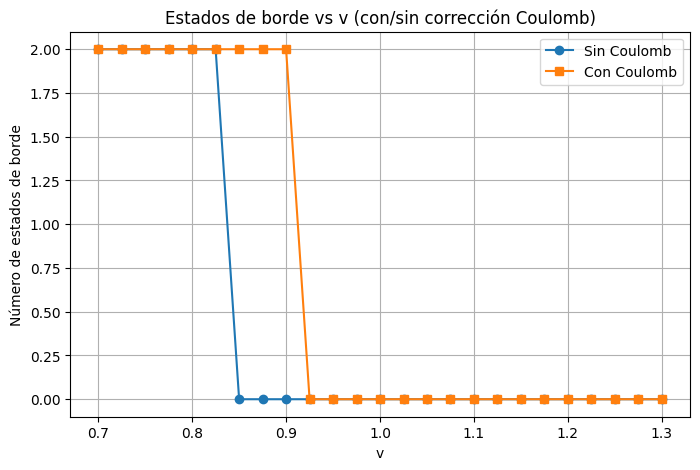

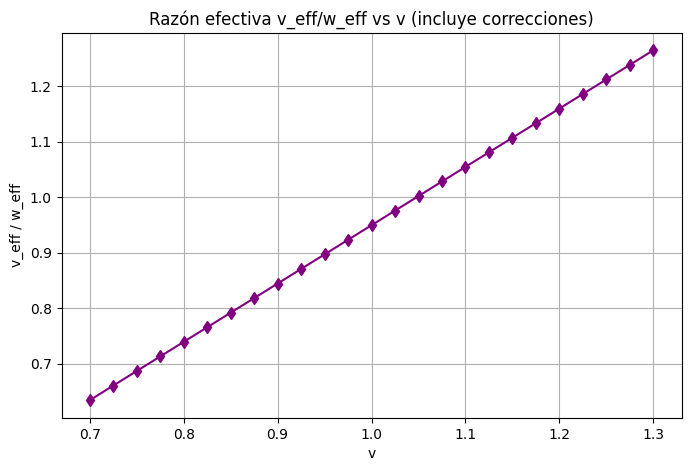

δv = -9.600973e-02 eV, δw = -4.800487e-02 eV

v	SinC	ConC	v_eff/w_eff
0.700	2	2	0.634
0.725	2	2	0.661
0.750	2	2	0.687
0.775	2	2	0.713
0.800	2	2	0.739
0.825	2	2	0.766
0.850	0	2	0.792
0.875	0	2	0.818
0.900	0	2	0.845
0.925	0	0	0.871
0.950	0	0	0.897
0.975	0	0	0.923
1.000	0	0	0.950
1.025	0	0	0.976
1.050	0	0	1.002
1.075	0	0	1.028
1.100	0	0	1.055
1.125	0	0	1.081
1.150	0	0	1.107
1.175	0	0	1.133
1.200	0	0	1.160
1.225	0	0	1.186
1.250	0	0	1.212
1.275	0	0	1.238
1.300	0	0	1.265


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Recalcular y graficar los resultados de la demostración
ssh = SSHModelExact(N_cells=20, v=0.9, w=1.0)
ssh.setup_coulomb_parameters()
v_range = np.linspace(0.7, 1.3, 25)
results = ssh.calculate_physical_corrections(v_range, w_fixed=1.0)

edge_nc = np.array(results['edge_no_coulomb'])
edge_c = np.array(results['edge_coulomb'])
ratios = np.array(results['effective_ratios'])
delta_v = results['delta_v']
delta_w = results['delta_w']

# Figura 1: estados de borde con/sin corrección Coulomb
plt.figure(figsize=(8,5))
plt.plot(v_range, edge_nc, 'o-', label='Sin Coulomb')
plt.plot(v_range, edge_c, 's-', label='Con Coulomb')
plt.xlabel('v')
plt.ylabel('Número de estados de borde')
plt.title('Estados de borde vs v (con/sin corrección Coulomb)')
plt.legend()
plt.grid(True)
plt.show()

# Figura 2: razón efectiva v_eff/w_eff
plt.figure(figsize=(8,5))
plt.plot(v_range, ratios, 'd-', color='purple')
plt.xlabel('v')
plt.ylabel('v_eff / w_eff')
plt.title('Razón efectiva v_eff/w_eff vs v (incluye correcciones)')
plt.grid(True)
plt.show()

# Mostrar las correcciones aplicadas y una tabla resumida
print(f'δv = {delta_v:.6e} eV, δw = {delta_w:.6e} eV')
print('')



print('v	SinC	ConC	v_eff/w_eff')
for vi, nc, c, r in zip(v_range, edge_nc, edge_c, ratios):
    print(f"{vi:.3f}	{nc}	{c}	{r:.3f}")